# **Librerias**

In [1]:
# Importamos las Librerias 

import sklearn
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.datasets import load_diabetes, make_regression

# Versiones 

print(f'Numpy Version: {np.__version__}')
print(f'Sklearn Version: {sklearn.__version__}')
print(f'Matplotlib Version: {matplotlib.__version__}')

Numpy Version: 2.3.1
Sklearn Version: 1.7.1
Matplotlib Version: 3.10.3


# **Regresion Bayesiana** 

$$p(w \mid y, \theta) \propto p(w) \cdot p(y \mid w, \theta)$$
$$p(w \mid y, X, \sigma^2, \tau^2) \propto \mathcal{N}(w \mid w_0, \Sigma_0) \cdot \mathcal{N}(y \mid Xw, \sigma^2 I_n)$$
$$p(w \mid y, X, \sigma^2, \tau^2) \propto \frac{1}{(2 \pi)^{\frac{D}{2}} \cdot |\Sigma_0|^{\frac{1}{2}}} \cdot e^{-\frac{1}{2} (w - w_0)^T \Sigma_0^{-1} (w - w_0)} \cdot \frac{1}{(2 \pi)^{\frac{n}{2}} \cdot |\sigma^2 I_n|^{\frac{1}{2}}} \cdot e^{-\frac{1}{2} (y - Xw)^T \left(\sigma^2 I_n\right)^{-1} (y - Xw)}$$

**Priori** 

$$p(w) = \frac{1}{(2 \pi)^{\frac{D}{2}} \cdot |\Sigma_0|^{\frac{1}{2}}} \cdot e^{-\frac{1}{2} (w - w_0)^T \Sigma_0^{-1} (w - w_0)}$$

**Verosimilitud**

$$p(y \mid w, \theta) = \frac{1}{(2 \pi)^{\frac{n}{2}} \cdot |\sigma^2 I_n|^{\frac{1}{2}}} \cdot e^{-\frac{1}{2\sigma^2} (y - Xw)^T (y - Xw)}$$

**Log Posteriori**  

$$LL(w \mid y, X, \sigma^2, \tau^2) = \log \left(\frac{1}{(2 \pi)^{\frac{D}{2}} \cdot |\Sigma_0|^{\frac{1}{2}}} \cdot e^{-\frac{1}{2} (w - w_0)^T \Sigma_0^{-1} (w - w_0)} \cdot  \frac{1}{(2 \pi)^{\frac{n}{2}} \cdot |\sigma^2 I_n|^{\frac{1}{2}}} \cdot e^{-\frac{1}{2\sigma^2} (y - Xw)^T (y - Xw)}\right)$$
$$LL(w \mid y, X, \sigma^2, \tau^2)  = \log \left(\frac{1}{(2 \pi)^{\frac{D}{2}} \cdot |\Sigma_0|^{\frac{1}{2}}} \cdot e^{-\frac{1}{2} (w - w_0)^T \Sigma_0^{-1} (w - w_0)}\right) + \log \left( \frac{1}{(2 \pi)^{\frac{n}{2}} \cdot |\sigma^2 I_n|^{\frac{1}{2}}} \cdot e^{-\frac{1}{2\sigma^2} (y - Xw)^T (y - Xw)}\right)$$

$$LL(w \mid y, X, \sigma^2, \tau^2)  = - \frac{D}{2} \log 2\pi - \frac{1}{2} \log \left(|\Sigma_0|\right) - \frac{1}{2} (w - w_0)^T \Sigma_0^{-1} (w - w_0) - \frac{n}{2} \log 2\pi - \frac{1}{2} \log \left(|\sigma^2 I_n|\right) - \frac{1}{2 \sigma^2} \cdot (y - Xw)^T (y - Xw)$$
$$LL(w \mid y, X, \sigma^2, \tau^2)  = - \frac{D}{2} \log 2\pi - \frac{1}{2} \log \left(|\Sigma_0|\right) - \frac{1}{2} (w - w_0)^T \Sigma_0^{-1} (w - w_0) - \frac{n}{2} \log 2\pi - \frac{n}{2} \log \sigma^2 - \frac{1}{2 \sigma^2} \cdot (y - Xw)^T (y - Xw)$$

**Simplificamos**

$$LL(w \mid y, X, \sigma^2, \tau^2)  = - \frac{1}{2} (w - w_0)^T \Sigma_0^{-1} (w - w_0) - \frac{1}{2 \sigma^2} \cdot (y - Xw)^T (y - Xw)$$
$$LL(w \mid y, X, \sigma^2, \tau^2)  = - \frac{1}{2} \left[w^T\Sigma_0^{-1}w - w^T\Sigma_0^{-1}w_0 - w_0^T\Sigma_0^{-1} w + w_0^T\Sigma_0^{-1}w_0\right] - \frac{1}{2 \sigma^2} \left[y^Ty - y^TXw - w^TX^Ty + w^TX^TXw\right]$$
$$LL(w \mid y, X, \sigma^2, \tau^2)  = - \frac{1}{2} \left[w^T\Sigma_0^{-1}w - 2 w^T\Sigma_0^{-1} w_0 + w_0^T\Sigma_0^{-1}w_0\right] - \frac{1}{2 \sigma^2} \left[y^Ty - 2 w^TX^Ty + w^TX^TXw\right]$$

**Artificio** 

$$-\frac{1}{2} (w - \mu)^T A (w - \mu) + \text{cte} = - \frac{1}{2} w^T Aw + w^T b$$

En donde 

* $b = A \mu$ 

* $\text{cte}$ son los parametros que no dependen de $w$

**Priori Conjugado** 

$$LL(w \mid y, X, \sigma^2, \tau^2)  = -\frac{1}{2} w^T \left(\Sigma_0^{-1} + \frac{1}{\sigma^2} X^TX\right)w + w^T \left(\Sigma_0^{-1} w_0 + \frac{1}{\sigma^2} X^T y\right)$$

$$A = \Sigma_n^{-1} = \Sigma_0^{-1} + \frac{1}{\sigma^2} X^TX$$

$$A^{-1} = \Sigma_n = \left(\Sigma_0^{-1} + \frac{1}{\sigma^2} X^TX\right)^{-1}$$

$$A^{-1}b = \mu_n = \Sigma_n \left(\Sigma_0^{-1} w_0 + \frac{1}{\sigma^2} X^Ty\right)$$

$$p(w \mid y, X, \sigma^2, \tau^2) \propto \mathcal{N}\left(w \mid \Sigma_n \left(\Sigma_0^{-1} w_0 + \frac{1}{\sigma^2} X^Ty\right), \left(\Sigma_0^{-1} + \frac{1}{\sigma^2} X^TX\right)^{-1}\right)$$

**Ejemplo con el Prior de Ridge**

$$w_0 = 0$$
$$\Sigma_0 = \tau^2 I_D$$

$$p(w \mid y, X, \sigma^2, \tau^2) \propto \mathcal{N}\left(w \mid \mu_n, \Sigma_n\right)$$

$$\mu_n = \Sigma_n \left(\Sigma_0^{-1} w_0 + \frac{1}{\sigma^2} X^Ty\right) = \left(\Sigma_0^{-1} + \frac{1}{\sigma^2} X^TX\right)^{-1} \cdot \left(\Sigma_0^{-1} w_0 + \frac{1}{\sigma^2} X^Ty\right) = \left(\frac{1}{\tau^2} I_D + \frac{1}{\sigma^2} X^TX\right)^{-1} \cdot \left(\frac{1}{\sigma^2} X^Ty\right) = \left(\frac{\sigma^2}{\tau^2} I_D + X^TX\right)^{-1} X^Ty$$

$$\Sigma_n = \left(\Sigma_0^{-1} + \frac{1}{\sigma^2} X^TX\right)^{-1} = \left(\frac{1}{\tau^2} I_d + \frac{1}{\sigma^2} X^TX\right)^{-1}$$

$$p(w \mid y, X, \sigma^2, \tau^2) \propto \mathcal{N}\left(w \mid \left(\frac{\sigma^2}{\tau^2} I_D + X^TX\right)^{-1} X^Ty, \left(\frac{1}{\tau^2} I_d + \frac{1}{\sigma^2} X^TX\right)^{-1}\right)$$

### **Scikit-Learn**

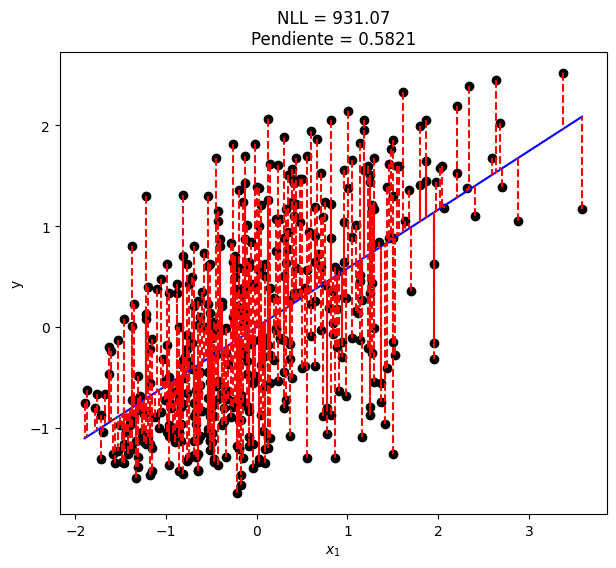

In [2]:
# Definimos el Dataset (Seleccionamos una Feature)

dataset_diabetes = load_diabetes()

X = dataset_diabetes.data[:, [2]]
y = dataset_diabetes.target

# Normalizamos los Datos (Nos da estabilidad numerica para estas visualizaciones)

X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

# Definimos la Funcion de Negative Log-Likehood (Penalizamos solo los Pesos no el Sesgo por eso D-1)

def NLL(X, w, sigma2 = 1, tau2 = 1): 

    n = X.shape[0]    
    D = X.shape[1] - 1

    resid = y - X @ w

    nll_prior = (D / 2) * np.log(2 * np.pi * tau2) + (w @ w) / (2 * tau2)
    nll_likelihood = (n / 2) * np.log(2 * np.pi * sigma2) + (resid @ resid) / (2 * sigma2) 

    nll = nll_prior + nll_likelihood

    return nll  

# Obtenemos el parametro de Maxima A Posteriori

sigma2 = 10
tau2 = 3

model = Ridge(alpha = sigma2 / tau2, fit_intercept = True)
model.fit(X, y)

w_opt = np.array([model.intercept_, model.coef_[0]])

m_opt = model.coef_[0]
b_opt = model.intercept_

# Calculamos Negative Log-Likehood 

X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])

y_pred = X_with_bias @ w_opt

nll = NLL(X_with_bias, w_opt, sigma2, tau2)  

# Visualizamos 

fig = plt.figure(figsize = (24,6))
ax1 = fig.add_subplot(1, 3, 1)

x_line = np.linspace(X.min(), X.max(), 100)
y_line = w_opt[1]*x_line + w_opt[0]

ax1.scatter(X, y, color = 'black', label = 'Muestras')
ax1.plot(x_line, y_line, color = 'blue', label = 'Recta')

for xi, yi in zip(X.ravel(), y):
    y_pred = w_opt[1] * xi + w_opt[0]
    ax1.plot([xi, xi], [yi, y_pred], color = 'red', linestyle = '--')    
    
ax1.set_title(f'NLL = {nll :.2f}\nPendiente = {w_opt[1] :.4f}')
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel('y')

plt.show()

### **Forma Bayesiana**

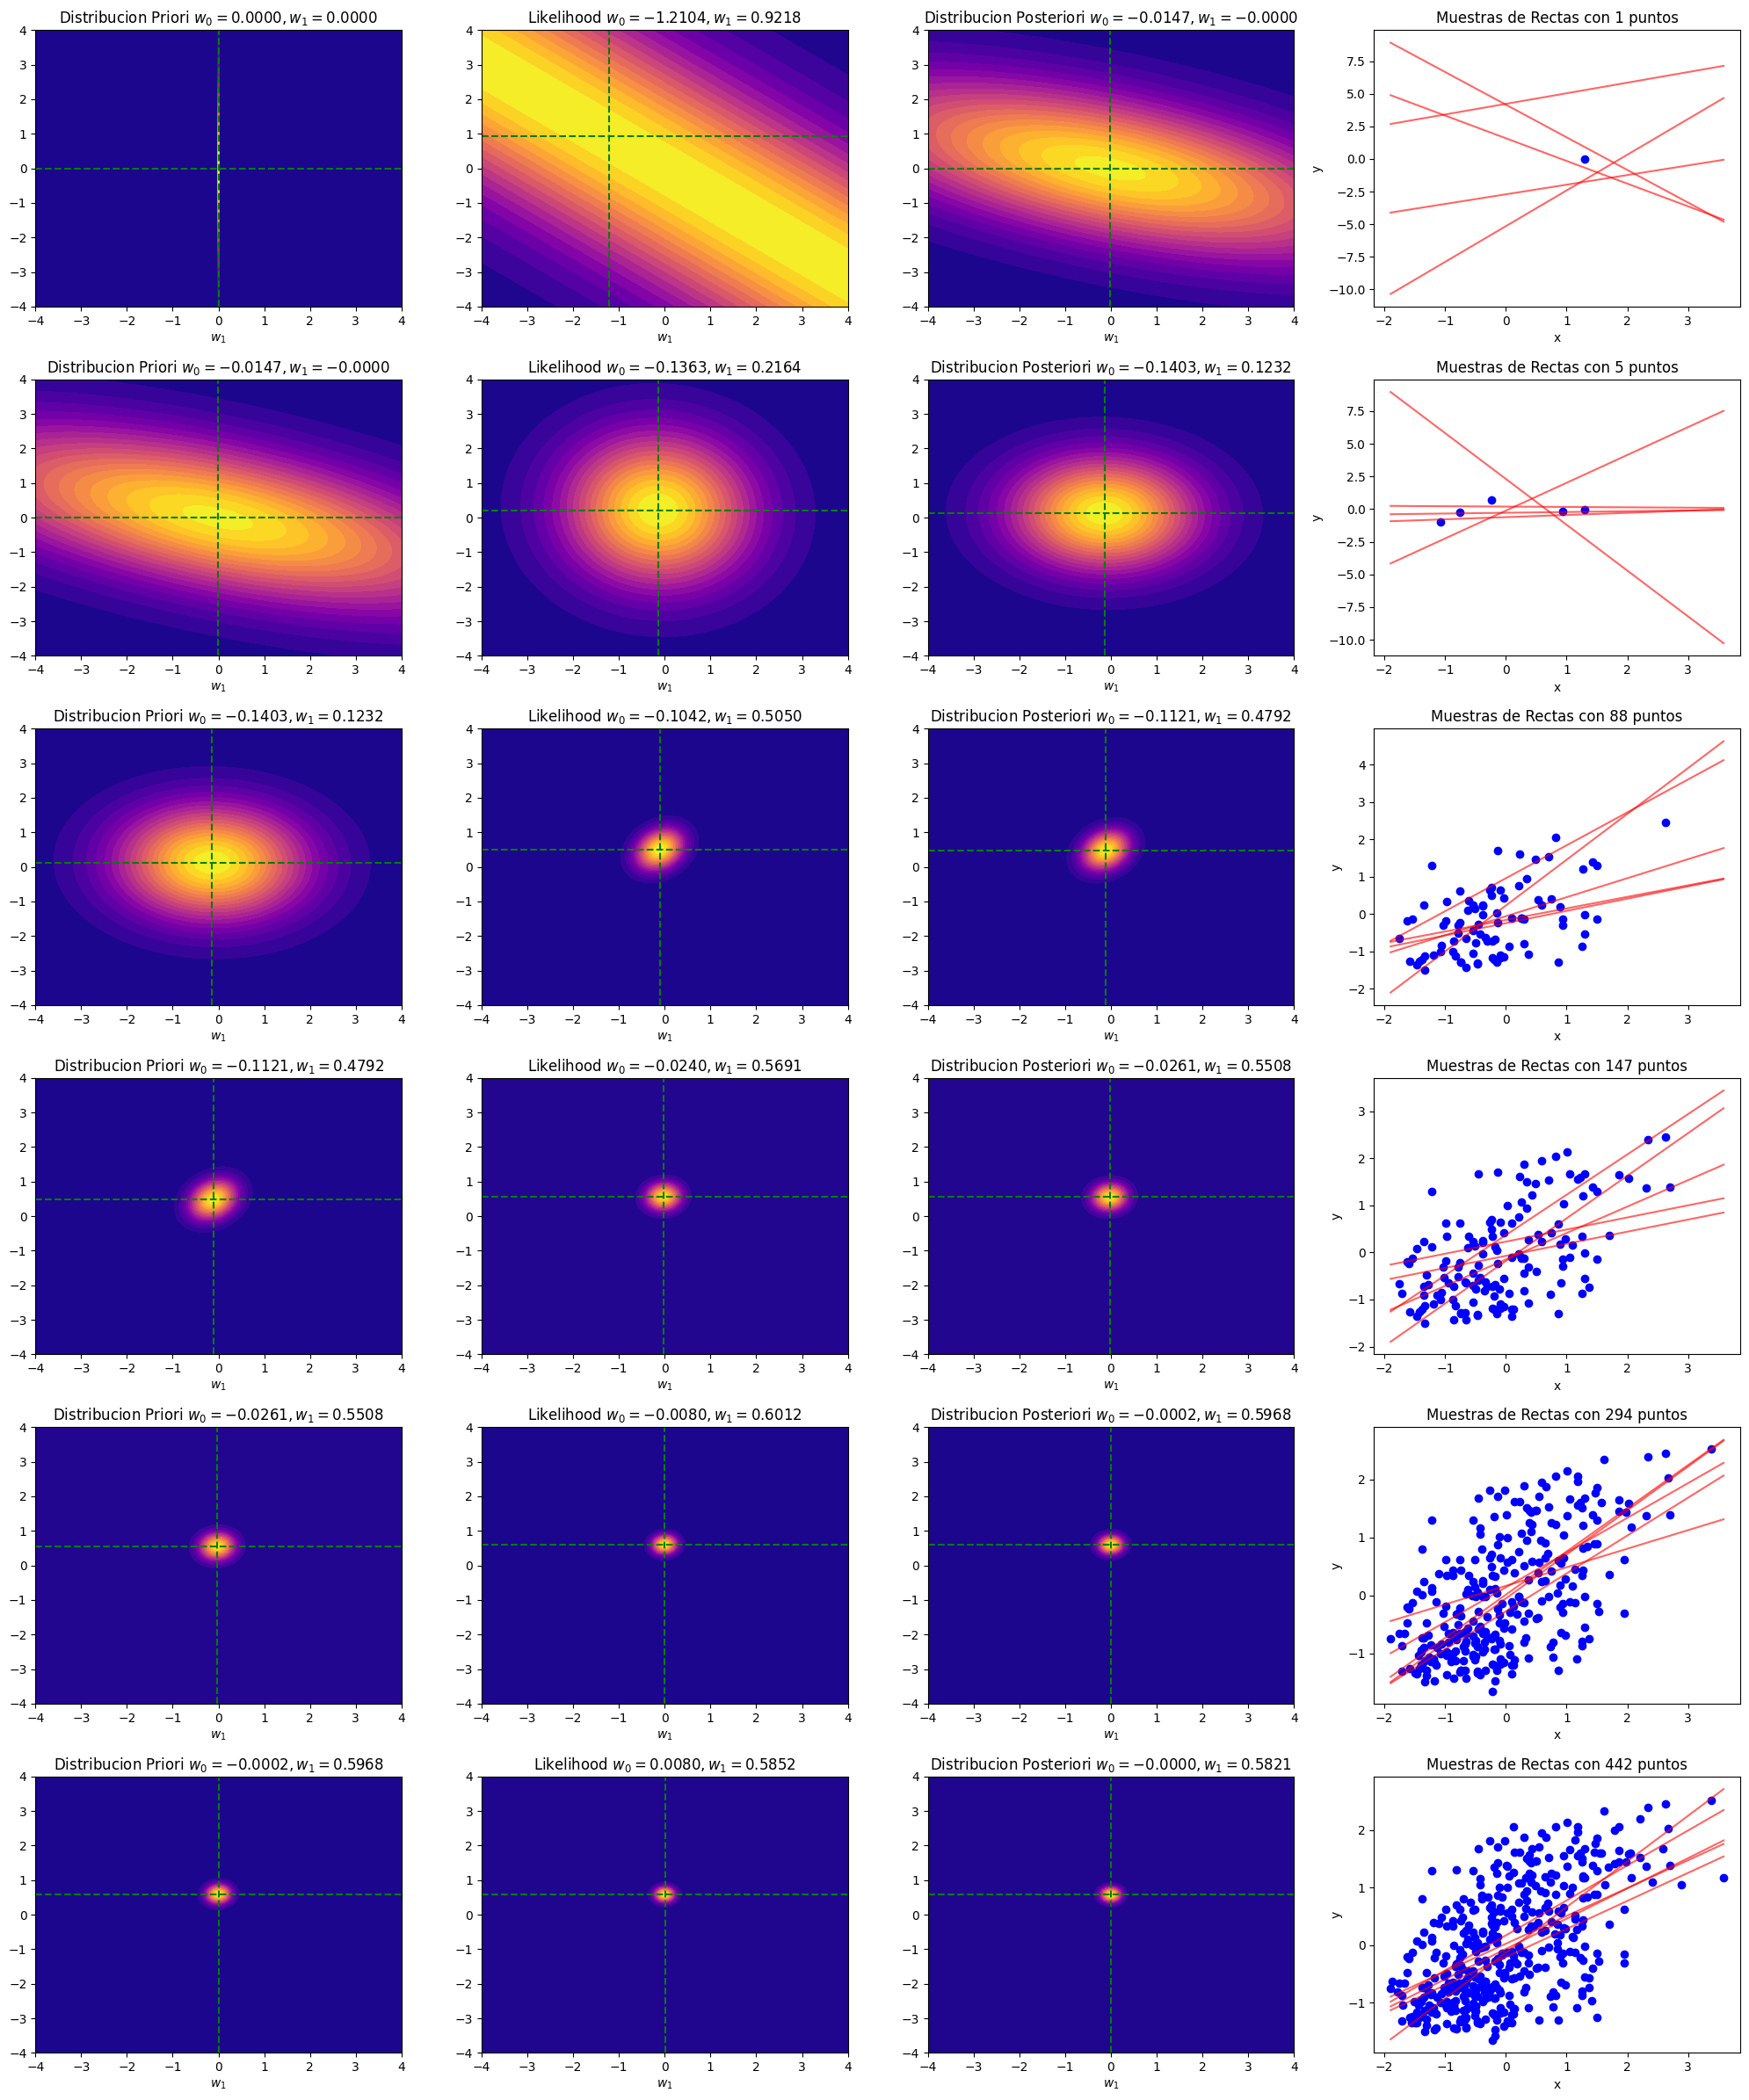

In [3]:
# Definimos el Dataset (Seleccionamos una Feature)

dataset_diabetes = load_diabetes()

X = dataset_diabetes.data[:, [2]]
y = dataset_diabetes.target

# Normalizamos los Datos (Nos da estabilidad numerica para estas visualizaciones)

X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

# Posterior de una Regresion Lineal Bayesiana 

def posterior(X, y, tau2, sigma2):

    N, D = X.shape

    X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])

    prior_precision = np.diag([1e-6] + D * [1 / tau2])
    
    Sigma_n = np.linalg.inv(prior_precision + (1 / sigma2) * X_with_bias.T @ X_with_bias)
    mu_n = (1 / sigma2) * Sigma_n @ X_with_bias.T @ y

    return mu_n, Sigma_n

# Probability Density Function de la Distribucion Gaussiana 

def gaussian_pdf(w0_grid, w1_grid, mu, Sigma):

    W0, W1 = np.meshgrid(w0_grid, w1_grid, indexing = "xy")
    data = np.stack([W0, W1], axis = -1)
    
    inv_Sigma = np.linalg.inv(Sigma)
    det_Sigma = np.linalg.det(Sigma)
    
    diff = data - mu

    pdf = (1 / (2 * np.pi * np.sqrt(det_Sigma))) * np.exp(-0.5 * np.einsum('...i,ij,...j->...', diff, inv_Sigma, diff))

    return pdf, W0, W1

# Verosimilitud 

def likelihood(w0_grid, w1_grid, X, y, sigma2): 

    W0, W1 = np.meshgrid(w0_grid, w1_grid, indexing = "xy")

    residuals = y[:, None, None] - (W0[None,:,:] + W1[None,:,:] * X[:,0][:,None,None]) 

    like = np.exp(-(1 / (2 * sigma2)) * np.sum(residuals**2, axis = 0))
    like /= np.trapezoid(np.trapezoid(like, w1_grid, axis = 1), w0_grid, axis = 0)

    return like, W0, W1

# Visualizamos 

sigma2 = 10
tau2 = 3

phases = [1, 5, len(X)//5, len(X)//3, int(len(X)//1.5), len(X)]

fig = plt.figure(figsize = (20, 4*len(phases)))

w_range = np.linspace(-4, 4, 500)

mu_prior = np.zeros(2)
Sigma_prior = np.diag([1e-6, tau2])

for i, n_points in enumerate(phases):

    mu_n, Sigma_n = posterior(X[:n_points], y[:n_points], tau2, sigma2)

    ax = fig.add_subplot(len(phases), 4, 4*i+1)
    pdf, W0, W1 = gaussian_pdf(w_range, w_range, mu_prior, Sigma_prior)
    ax.contourf(W0, W1, pdf, levels = 20, cmap = "plasma")
    ax.axvline(mu_prior[0], color = "green", linestyle = "--")
    ax.axhline(mu_prior[1], color = "green", linestyle = "--")
    ax.set_title(f"Distribucion Priori $w_0 = {mu_prior[0]:.4f}, w_1 = {mu_prior[1]:.4f}$")
    ax.set_xlabel(r"$w_0$")
    ax.set_xlabel(r"$w_1$")

    ax = fig.add_subplot(len(phases), 4, 4*i+2)

    if n_points == 0:
        ax.set_title("Likelihood (Sin Datos)")
    else:
        like, W0, W1 = likelihood(w_range, w_range, X[:n_points], y[:n_points], sigma2)
        ax.contourf(W0, W1, like, levels = 20, cmap = "plasma")
        idx_max = np.unravel_index(np.argmax(like), like.shape)
        ax.axvline(W0[idx_max], color = "green", linestyle = "--")
        ax.axhline(W1[idx_max], color = "green", linestyle = "--")
        ax.set_title(f"Likelihood $w_0 = {W0[idx_max]:.4f}, w_1 = {W1[idx_max]:.4f}$")
    ax.set_xlabel(r"$w_0$")
    ax.set_xlabel(r"$w_1$")

    ax = fig.add_subplot(len(phases), 4, 4*i+3)
    pdf, W0, W1 = gaussian_pdf(w_range, w_range, mu_n, Sigma_n)
    ax.contourf(W0, W1, pdf, levels = 20, cmap = "plasma")
    ax.axvline(mu_n[0], color = "green", linestyle = "--")
    ax.axhline(mu_n[1], color = "green", linestyle = "--")
    ax.set_title(f"Distribucion Posteriori $w_0 = {mu_n[0]:.4f}, w_1 = {mu_n[1]:.4f}$")
    ax.set_xlabel(r"$w_0$")
    ax.set_xlabel(r"$w_1$")

    ax = fig.add_subplot(len(phases), 4, 4*i+4)
    xs = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

    for w_s in np.random.multivariate_normal(mu_n, Sigma_n, size = 5):
        ys = w_s[0] + w_s[1] * xs
        ax.plot(xs, ys, color = "red", alpha = 0.6)

    if n_points > 0:
        ax.scatter(X[:n_points], y[:n_points], color = "blue")
    ax.set_title(f"Muestras de Rectas con {n_points} puntos")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    mu_prior, Sigma_prior = mu_n, Sigma_n

plt.tight_layout() 
plt.show()

# **Inferencia en Regresion Lineal Bayesiana**

Una vez que hemos ajustado el **modelo de regresión lineal bayesiana** a los **datos de entrenamiento**, podemos inferir la distribución de un nuevo valor $y^*$ dado un nuevo **vector de caracteristicas** $x^*$

$$p(y^* \mid x^*, D, \sigma^2) = \int p(y^* \mid x^*, w, \sigma^2) \cdot p(w \mid D) \hspace{0.1cm} dw = \int \mathcal{N}(y^* \mid x^*{}^T w , \sigma^2) \hspace{0.1cm}  \mathcal{N}(w \mid \mu_n, \Sigma_n) \hspace{0.05cm} dw  = \mathcal{N}(y^* \mid x^*{}^T \mu_n, \sigma^2 + x^*{}^T \Sigma_n x^*)$$

En el caso en que ya tengamos un **vector de pesos estimado** $\hat{w}$, **la inferencia** se vuelve más **determinística**:

$$p(y^* \mid x^*, D, \sigma^2)  \approx \int \mathcal{N}(y^* \mid x^*{}^T w , \sigma^2) \hspace{0.1cm} \delta(w - \hat{w})\hspace{0.05cm} dw  = \mathcal{N}(y^* \mid x^*{}^T \hat{w} , \sigma^2)$$

**Nota:** En el caso donde **inferimos con la regresion lineal bayesiana** mientras mas alejados a los **datos de entrenamiento** mayor incertidumbre

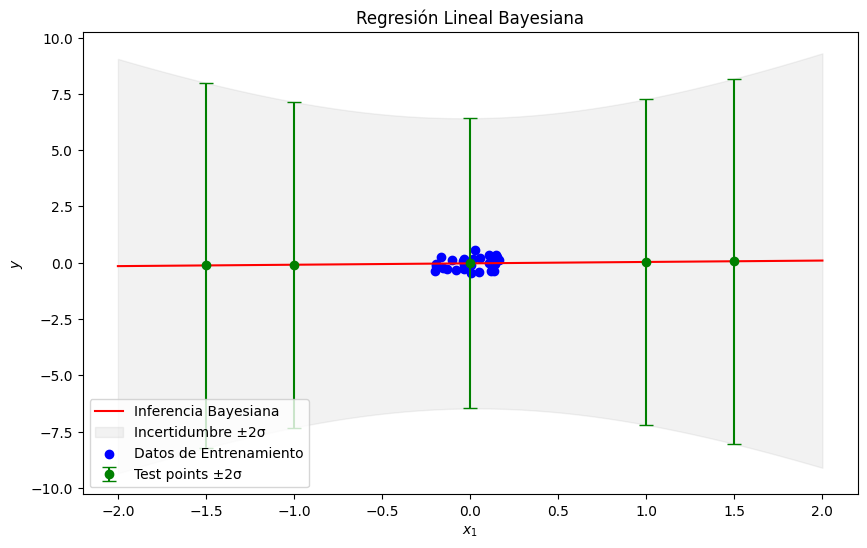

In [4]:
# Semilla

np.random.seed(42)

# Definimos el Dataset

X, y = make_regression(n_samples = 200, n_features = 1, noise = 20.0)

# Normalizamos los Datos (Nos da estabilidad numerica para estas visualizaciones)

X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

# Definimos los Datos de Entrenamiento (Seleccionamos los que estan cerca del centro)

train_idx = np.where((X.flatten() > -0.2) & (X.flatten() < 0.2))[0]

X_train, y_train = X[train_idx], y[train_idx]

# Definimos los Datos de Testeo 

X_test = np.linspace(-2, 2, 50).reshape(-1,1)

# Definimos algunos Puntos especificos del conjunto de Testeo (Chequeo de varianza en esos puntos)

X_test_points = np.array([[-1.5], [-1.0], [0.0], [1.0], [1.5]])
X_test_points_bias = np.hstack([np.ones((X_test_points.shape[0], 1)), X_test_points])

# Definimos la Regresion Bayesiana

def posterior(X, y, tau2, sigma2):

    N, D = X.shape

    X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])

    prior_precision = np.diag([1e-6] + D * [1 / tau2])
    
    Sigma_n = np.linalg.inv(prior_precision + (1 / sigma2) * X_with_bias.T @ X_with_bias)
    mu_n = (1 / sigma2) * Sigma_n @ X_with_bias.T @ y

    return mu_n, Sigma_n

# Entrenamos el Modelo 

sigma2 = 10
tau2 = 3

mu_n, Sigma_n = posterior(X_train, y_train, tau2, sigma2)

# Inferimos en sobre los Datos de Testeo 

X_test_bias = np.hstack([np.ones((X_test.shape[0],1)), X_test])

y_mean = X_test_bias @ mu_n
y_std = np.sqrt(sigma2 + np.sum(X_test_bias @ Sigma_n * X_test_bias, axis = 1))

# Inferimos sobre los Puntos Especificos

y_points_mean = X_test_points_bias @ mu_n
y_points_std = np.sqrt(sigma2 + np.sum(X_test_points_bias @ Sigma_n * X_test_points_bias, axis=1))

# Visualizamos 

plt.figure(figsize = (10,6))

plt.plot(X_test, y_mean, color = 'red', label = 'Inferencia Bayesiana')
plt.fill_between(X_test.flatten(), y_mean - 2*y_std, y_mean + 2*y_std, color = 'gray', alpha = 0.1, label = 'Incertidumbre ±2σ')

plt.errorbar(X_test_points.flatten(), y_points_mean, yerr = 2*y_points_std, fmt = 'o', color = 'green', capsize = 5, label = 'Test points ±2σ')
plt.scatter(X_train, y_train, color = 'blue', label = 'Datos de Entrenamiento')

plt.xlabel(r"$x_1$")
plt.ylabel(r"$y$")
plt.title("Regresión Lineal Bayesiana")
plt.legend()
plt.show()

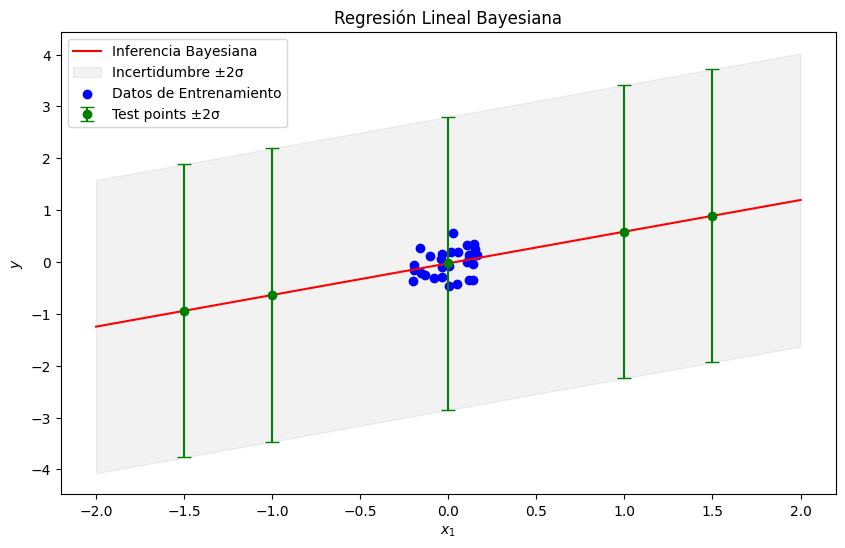

In [5]:
# Semilla

np.random.seed(42)

# Definimos el Dataset

X, y = make_regression(n_samples = 200, n_features = 1, noise = 20.0)

# Normalizamos los Datos (Nos da estabilidad numerica para estas visualizaciones)

X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

# Definimos los Datos de Entrenamiento (Seleccionamos los que estan cerca del centro)

train_idx = np.where((X.flatten() > -0.2) & (X.flatten() < 0.2))[0]

X_train, y_train = X[train_idx], y[train_idx]

# Definimos los Datos de Testeo 

X_test = np.linspace(-2, 2, 50).reshape(-1,1)

# Definimos algunos Puntos especificos del conjunto de Testeo (Chequeo de varianza en esos puntos)

X_test_points = np.array([[-1.5], [-1.0], [0.0], [1.0], [1.5]])

# Ya conocemos por algun metodo nuestro vector de pesos 

w_hat = np.array([-0.02491962,  0.61071933])

# La varianza tambien la concemos

sigma2 = 2

# Inferimos en sobre los Datos de Testeo 

X_test_bias = np.hstack([np.ones((X_test.shape[0],1)), X_test])

y_mean = X_test_bias @ w_hat

# Inferimos en sobre los Puntos Especificos

X_test_points_bias = np.hstack([np.ones((X_test_points.shape[0],1)), X_test_points])

y_points_mean = X_test_points_bias @ w_hat 

# Visualizamos 

plt.figure(figsize = (10,6))

plt.plot(X_test, y_mean, color = 'red', label = 'Inferencia Bayesiana')
plt.fill_between(X_test.flatten(), y_mean - 2*np.sqrt(sigma2), y_mean + 2*np.sqrt(sigma2), color = 'gray', alpha = 0.1, label = 'Incertidumbre ±2σ')

plt.errorbar(X_test_points.flatten(), y_points_mean, yerr = 2*np.sqrt(sigma2), fmt = 'o', color = 'green', capsize = 5, label = 'Test points ±2σ')
plt.scatter(X_train, y_train, color = 'blue', label = 'Datos de Entrenamiento')

plt.xlabel(r"$x_1$")
plt.ylabel(r"$y$")
plt.title("Regresión Lineal Bayesiana")
plt.legend()
plt.show()
